# Selection_Criteria

In this notebook, I will be trying to go through my attempt to show how the paper, https://cds.cern.ch/record/2002772/files/LHCb-CONF-2015-002.pdf , reduces background.

## Pip installs to make this notebook work

```cmd
pip install mpl-scatter-density
```


In [1]:
#imports for notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_scatter_density 
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import StrMethodFormatter


In [2]:
#loads in the total_dataset
data = pd.read_csv('../data/total_dataset.csv')

## Graphing: $q^{2}$ vs m($K^{+}\pi^{-}\mu^{+}\mu^{-}$)

This exercise was mainly for me to make sure I am using the correct data to reproduce the graph on pg. 6 Fig.1 

d:\Languages\Python\Python39\lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
d:\Languages\Python\Python39\lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


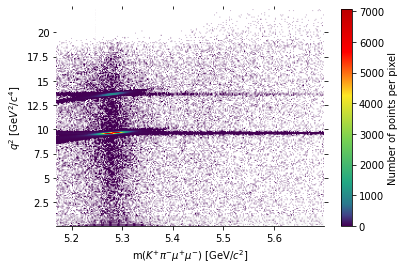

In [3]:
x = data['B0_M']*1e-3 # To get GeV
y = data['q2']

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (5e-4, '#440053'),
    (0.05, '#404388'),
    (0.1, '#2a788e'),
    (0.2, '#21a784'),
    (0.4, '#78d151'),
    (0.6, '#fde624'),
    (0.8, '#ff0000'),
    (1, '#ba0000'),
], N=len(y))



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
 # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
plt.ylabel(r'$q^{2}$ [Ge$V^{2}$/$c^{4}$]')
density = ax.scatter_density(x, y, cmap=white_viridis)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

As stated on pg 6 of the paper, we see the decay process $B^{0} \rightarrow K^{*0}\mu^{+}\mu^{-}$ around 5.3 GeV/$c^{2}$. Around $q^{2}$ values of 13 and 9 $GeV^{2}$/$c^{4}$, $B^{0} \rightarrow J/{\psi}K^{*0}$ and $B^{0} \rightarrow {\psi}(2s)K^{*0}$ dominate and they are excluded from the analysis according to the paper. There is also another decay process we will be rejecting according to the paper: https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.125.011802, $B^{0} \rightarrow  \Phi(1020)(\rightarrow \mu^{+}\mu^{-})K^{*0}$. The $q^{2}$ ranges we will therefore be rejecting are '8.0 < $q^{2}$ < 11.0 $GeV^{2}$/$c^{4}$ ,12.5 < $q^{2}$ < 15.0 $GeV^{2}$/$c^{4}$, and 0.98< $q^{2}$ <1.10 $GeV^{2}$/$c^{4}$'.

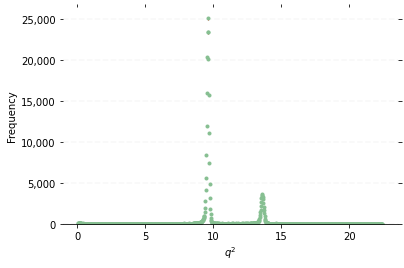

In [4]:
# Plotting the mass distribution over entire q^2 range
n_q2,bin_edges_q2 = np.histogram(data['q2'],bins = 1000)

#calculates the mid point of each bin.
mid_bin = (bin_edges_q2[1:]+bin_edges_q2[:-1])*0.5


# what is the error in this plot?
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.errorbar(mid_bin,n_q2, yerr = np.sqrt(n_q2), ls = 'none', color = '#FF0000', elinewidth=1)
ax.plot(mid_bin,n_q2, ".", color='#86bf91')
ax.set_ylim(ymin=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
 # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.xlabel(r'$q^{2}$')
plt.ylabel(r'Frequency')
plt.show()

## Graphing: Events vs m($K^{+}\pi^{-}\mu^{+}\mu^{-}$)

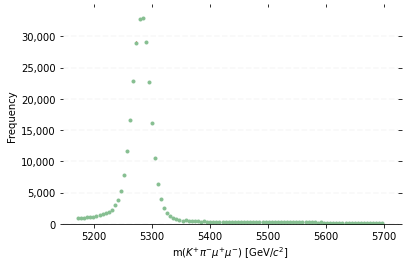

In [5]:
# Plotting the mass distribution over entire q^2 range
n_b0,bin_edges_b0 = np.histogram(data['B0_M'],bins = 100)

#calculates the mid point of each bin.
mid_bin = (bin_edges_b0[1:]+bin_edges_b0[:-1])*0.5


# what is the error in this plot?
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.errorbar(mid_bin,n_b0, yerr = np.sqrt(n_b0), ls = 'none', color = '#FF0000', elinewidth=1)
ax.plot(mid_bin,n_b0, ".", color='#86bf91')
ax.set_ylim(ymin=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
 # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
plt.ylabel(r'Frequency')
plt.show()

The graph above does not look like the expected graph in figure. 

Slection Criteria Taken From: https://link.springer.com/content/pdf/10.1007/JHEP02(2016)104.pdf

## Preparation For Selection Criteria

We will be working out different parameters which will be useful for elements of the selection criteria.

In [6]:
#Checks to see if all the momentum of the final decay products match b0 momentum  - it doesn't exactly.

matches = 0

for i in range(10):
    if i%1000 == 0:
        print(i,' comparisons completed.')
    x_p = data['mu_plus_PX'][i] + data['mu_minus_PX'][i] + data['K_PX'][i] + data['Pi_PX'][i]
    y_p = data['mu_plus_PY'][i] + data['mu_minus_PY'][i] + data['K_PY'][i] + data['Pi_PY'][i]
    z_p = data['mu_plus_PZ'][i] + data['mu_minus_PZ'][i] + data['K_PZ'][i] + data['Pi_PZ'][i]

    print(x_p, y_p, z_p)
    print(data['B0_PX'][i], data['B0_PY'][i], data['B0_PZ'][i])
    if x_p == data['B0_PX'][i] and y_p == data['B0_PY'][i] and z_p == data['B0_PZ'][i]:
        matches += 1

print(matches, ' matches out of ', len(data['mu_plus_PX']),'.')
    


0  comparisons completed.
6976.99 4383.73 128506.36
6963.96 4382.06 128493.56
2767.124975459005 -6548.833940244494 61576.01680307247
2768.885586773127 -6547.053811152374 61585.46677149644
16509.502531069178 -5684.400185686248 445731.8226382146
16510.835940492812 -5686.078325552898 445729.5576763026
208.22750112081275 11548.28551718807 85810.63187650044
207.50535926005765 11547.497047628196 85810.20556550965
-3308.900194893052 2190.02103322113 40809.293800712476
-3311.4946136404783 2197.0384846308784 40809.08482635975
-872.5086768755003 2847.012410692926 36846.31094165433
-870.2623870719639 2835.0859327793864 36842.90418279447
8271.360823834551 6746.907451717936 124524.0196709029
8272.265238728309 6749.810351573882 124525.50076445536
6840.507339983112 -1573.355135871689 63062.81402514579
6841.69813286842 -1572.290565935618 63068.68986993241
-3060.1640023498067 -7479.250105573307 161847.9641850273
-3060.1742948450383 -7482.675253322704 161869.86382448656
843.304877676166 9623.05327981056

## Selection Criteria

In [7]:
#Selection Criteria
# s_c_data = selection criteria data

#Removes q2 in ranges discussed earlier.
q2_1_range = data[data['q2'].between(0.1, 0.98 , inclusive= 'neither')]
q2_2_range= data[data['q2'].between(1.1, 8.0 , inclusive= 'neither')]
q2_3_range= data[data['q2'].between(11.0, 12.5 , inclusive= 'neither')]
q2_4_range= data[data['q2'].between(15, 19 , inclusive= 'neither')]

s_c_data = pd.concat([q2_1_range, q2_2_range, q2_3_range, q2_4_range], axis=0)

#Removes K_star which doesn't fall in a mass range.
s_c_data = s_c_data[s_c_data['Kstar_M'].between(796, 996 , inclusive= 'neither')]

#1.48 GeV/c in the 7 TeV and pT > 1.76 GeV/c in the 8 TeV data needs updating as 2016 used 13 Tev
s_c_data = s_c_data.loc[(s_c_data.mu_plus_PT > 3.5*1e3) | (s_c_data.mu_minus_PT > 3.5*1e3)]



## Plotting Mass distribution after selection criteria

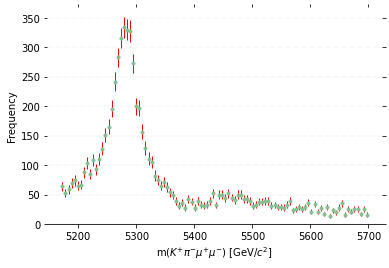

In [8]:

# Plotting the mass distribution over entire q^2 range
n_b0,bin_edges_b0 = np.histogram(s_c_data['B0_M'],bins = 100)

#calculates the mid point of each bin.
mid_bin = (bin_edges_b0[1:]+bin_edges_b0[:-1])*0.5

x = mid_bin
y = n_b0

#Ploting graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.errorbar(x,y, yerr = np.sqrt(y), ls = 'none', color = '#FF0000', elinewidth=1)
ax.plot(x,y, ".", color='#86bf91')
ax.set_ylim(ymin=0)

# Layout of graph - From Nick Khoze. ----------------------

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
 # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Format y-axis label
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#----------------------------------------------------------

plt.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
plt.ylabel(r'Frequency')
plt.show()